In [1]:
# !pip3 install torch_geometric
# !pip3 install torch-scatter
# !pip3 install torch-sparse
# !pip install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install sklearn
# !pip3 install PyTDC 
# !pip3 install pre-commit
# !pip3 install plotly
# !pip3 install tdc 
# !pip3 install ogb

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rdkit

from ogb.graphproppred import PygGraphPropPredDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from tdc.single_pred import Tox
from rdkit.Chem import AllChem
from rdkit import Chem

from time import time


In [16]:
PygGraphPropPredDataset(name="ogbg-molhiv", root=".\datasets")

PygGraphPropPredDataset(41127)

In [4]:
hiv_df = pd.read_csv(".\datasets\ogbg_molhiv\mapping\mol.csv.gz")

In [5]:
hiv_df.head()

,HIV_active,smiles,mol_id
0,0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,NaN
1,0,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,NaN
2,0,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,NaN
3,0,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,NaN
4,0,O=S(=O)(O)CCS(=O)(=O)O,NaN


In [6]:
X0 = hiv_df["smiles"]
y = hiv_df["HIV_active"]

In [7]:
X1 = X0.apply(Chem.MolFromSmiles)

[21:54:44] WARNING: not removing hydrogen atom without neighbors
[21:54:44] WARNING: not removing hydrogen atom without neighbors


In [8]:
X1_1 = [AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in X1]
X1_1np = np.array(X1_1)
X1_1np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]])

In [9]:
X1_2 = X1.apply(AllChem.GetMorganFingerprintAsBitVect,args=(2,))
X1_2np = np.array(list(X1_2)) # // for some reason can't just accept X1_2 ...
X1_2np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]])

In [10]:
X = X1_2np

<AxesSubplot:>

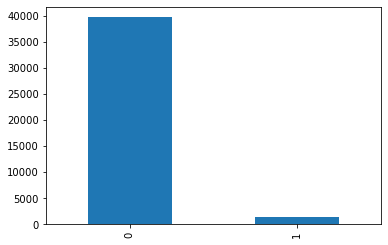

In [11]:
y.value_counts().plot.bar()

Might be worth to stratify

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
clf = RandomForestClassifier()

start = time()
clf.fit(X_train, y_train)
end = time()

In [14]:
print(f"training time: {start-end}s")

training time: -84.97222638130188s


In [15]:
print(f"AUROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")

AUROC: 0.8083316585236768
